# 1) Análisis exploratorio de Datos (EDA)
<p align="justify">

Análisis Exploratorio de Datos sobre el dataset sintetico con valores faltantes y valores atípicos, y por ultimos el dataset Distrofia Muscular de Duchenne (DMD).

In [ ]:
# Llamo a las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [ ]:
# Conectar el colab con nuestro drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Cargo el dataset
data_VF = pd.read_csv('/content/drive/MyDrive/........Data_.csv')
data_VF

,V1,V2,V3,V4,V5
0,C,1.0,986.175237,184.258917,2224.638050
1,C,1.0,994.130276,NaN,2570.213101
2,A,1.0,985.782622,196.893581,2309.238832
3,A,1.0,1029.464887,192.063247,2349.259233
4,A,1.0,1004.357092,NaN,2474.036357
...,...,...,...,...,...
1495,C,0.0,985.188653,190.366109,2302.000694
1496,C,0.0,991.730134,193.553401,2277.045998
1497,B,0.0,1032.150519,NaN,2347.760632
1498,C,1.0,984.522924,196.373516,2393.847484


In [ ]:
#Para tener en cuenta. Si el archivo no es .csv hay que generar el dataframe con la siguiente sintaxis:
df_VF = pd.DataFrame(data_VF)
df_VF

,V1,V2,V3,V4,V5
0,C,1.0,986.175237,184.258917,2224.638050
1,C,1.0,994.130276,NaN,2570.213101
2,A,1.0,985.782622,196.893581,2309.238832
3,A,1.0,1029.464887,192.063247,2349.259233
4,A,1.0,1004.357092,NaN,2474.036357
...,...,...,...,...,...
1495,C,0.0,985.188653,190.366109,2302.000694
1496,C,0.0,991.730134,193.553401,2277.045998
1497,B,0.0,1032.150519,NaN,2347.760632
1498,C,1.0,984.522924,196.373516,2393.847484


In [ ]:
#Observación de las primeras 5 filas
df_VF.head()

,V1,V2,V3,V4,V5
0,C,1.0,986.175237,184.258917,2224.638050
1,C,1.0,994.130276,NaN,2570.213101
2,A,1.0,985.782622,196.893581,2309.238832
3,A,1.0,1029.464887,192.063247,2349.259233
4,A,1.0,1004.357092,NaN,2474.036357


In [ ]:
#Organizacion de los datos (F/C)
print(df_VF.shape)

(1500, 5)


In [ ]:
#Estadisticos básicos
df_VF.describe()

,V2,V3,V4,V5
count,1341.000000,1396.000000,1087.000000,1382.000000
mean,0.500373,999.686269,196.414056,2395.781409
std,0.500186,24.099044,8.986208,131.714318
min,0.000000,916.828247,166.654303,2005.861180
25%,0.000000,984.023781,190.708818,2306.219362
50%,1.000000,999.385885,196.753671,2397.870540
75%,1.000000,1015.946214,202.423761,2480.880485
max,1.000000,1082.767001,225.195704,2866.799351


Consultas:

- Porque no aparece la variable V1?
- La V2 es categorica o dummy?

In [ ]:
#Correlación entre las variables
df_VF.drop('V1', axis = 1).corr()

,V2,V3,V4,V5
V2,1.000000,-0.008979,-0.018572,0.000571
V3,-0.008979,1.000000,-0.067935,-0.029989
V4,-0.018572,-0.067935,1.000000,0.934933
V5,0.000571,-0.029989,0.934933,1.000000


---
# 2) Preprocesamiento de Datos
<p align="justify">

El preprocesamiento de datos - a veces también conocido como transformación de datos o, incluso, ingeniería de atributos - es una de las parte más importante de la ciencia de datos, o tal vez la más importante.
Son muchos los pasos involucrados en este proceso, y eso que no los hemos mencionados a todos, pero sí los más importantes.
En este notebook, trabajaremos sobre cuatro grandes áreas:

-  Valores Faltantes
-  Valores Atípicos


Antes de arrancar, una pregunta usual que suele surgir es si usar Pandas o Scikit-Learn, ya que algunos de estos pasos pueden hacerse indistintamente con cualquiera de las dos librerías. Como siempre, la respuesta depende de lo que quieras hacer - y también con cuál herramienta te sientas más cómodo/a. Pero una respuesta rápida es que si estas explorando datos, mejor usar Pandas. Si estás en un flujo de Machine Learning, Scikit-Learn. Probablemente, termines usando las dos en un mismo notebook.

#### Algunas referencias

**Muy útil:** [documentación de Scikit-Learn sobre preprocesamiento de datos](https://scikit-learn.org/stable/modules/preprocessing.html)

**Valores Faltantes**

* En Pandas, explora las funcionalidades `isna()`, `dropna()` y `fillna()`.
* En Scikit-Learn, explora la clase `SimpleImputer`.

**Valores Atípicos**

* Para aplicar los criterios que mencionamos, bastará usar las técnicas de visualización que ya conoces, calcular percentiles, promedios y desviaciones estándar con NumPy o Pandas, y usar máscaras.
* En Scikit-Learn existen métodos para trabajar con valores atípicos. Si bien no los utilizaremos, no está demás si quieres mirarlos [aquí](https://scikit-learn.org/stable/modules/outlier_detection.html).


## 2.1. Valores Faltantes

Seguimos con el dataset de seis columnas y 1500 instancias. Salvo una columna, `V1`, todas tienen valores faltantes.

De las columnas con valores faltantes:
* Dos tienen valores faltantes MCAR (el valor faltante es completamente al azar y no depende de otras variables)
* Una tiene valores faltantes MAR (la probabilidad de valor faltante depende de otra variable).
* Una tiene valores faltantes MNAR (la probabilidad de valor faltante depende de esa misma variable).

### MCAR, MAR o MNAR - Aproximación de un posible análisis

El objetivo de esta sección es que analisis el origen de estos valores faltantes. Para ello:

1. Abre los datos y explóralos. Con ese fin, te recomendamos hacer un `pairplot` (con y sin `hue`) de Seaborn y contar los valores faltantes por columna. ¿Qué tipo de datos son?¿Cuáles son sus distribuciones?¿Te parece que hay alguna columna correlacionada con otra?

In [ ]:
#Valores faltantes por columna
lista_rows = list(df_VF.columns)
print(lista_rows)
for i in lista_rows:
    print (i, ': ', df_VF[i].isna().sum())

['V1', 'V2', 'V3', 'V4', 'V5']
V1 :  0
V2 :  159
V3 :  104
V4 :  413
V5 :  118


In [ ]:
#Otra forma
print(df_VF.isna().sum())

V1      0
V2    159
V3    104
V4    413
V5    118
dtype: int64


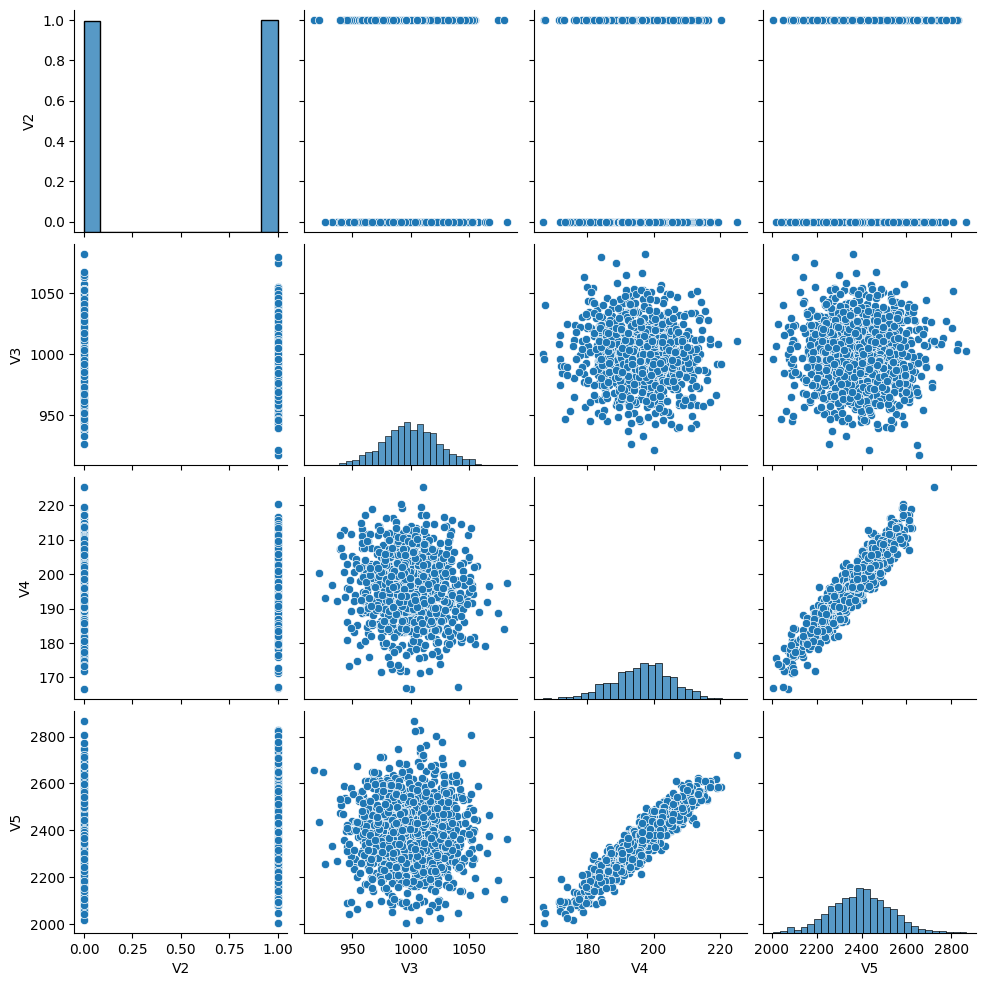

In [ ]:
import seaborn as sns
sns.pairplot(df_VF)

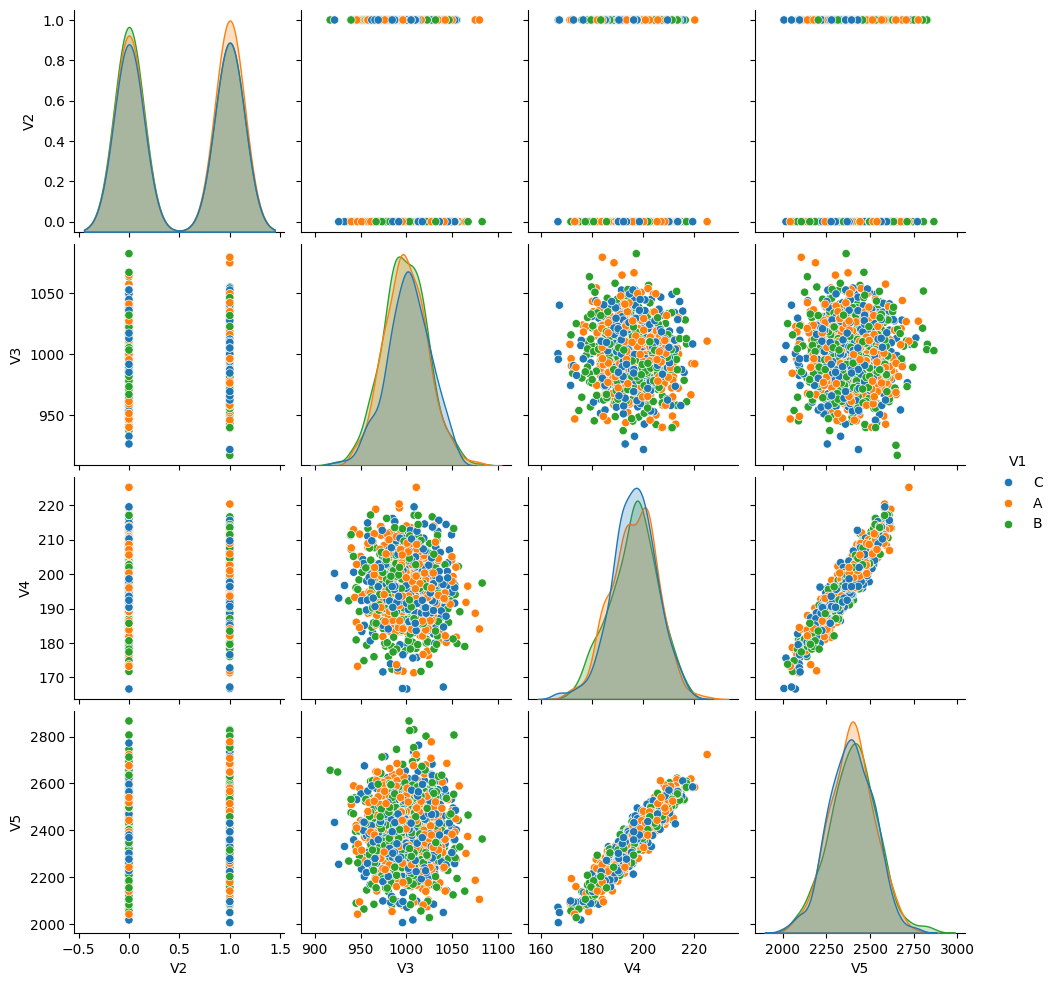

In [ ]:
#Gráfico
sns.pairplot(df_VF, hue = 'V1') #Si quiero ordenar por etiquera agrego: hue_order=['A', 'B', 'C']

2. Buscaremos decidir el mecanismo que dio origen a los valores faltante de cada columna. Para ello, ten en cuenta que:
* Para simplificar el análisis, si hay valores MAR, la dependencia sólo puede ser con la columna categórica sin valores faltantes, `V1`. Entonces, basta que solamente pruebes dependencia con esa variable. Te puede ser útil [esta pregunta de Stack Overflow](https://stackoverflow.com/questions/43321455/pandas-count-null-values-in-a-groupby-function/43322220).
* MNAR puede es difícil de estudiar si no tenemos conocimiento del tema o si no hay una variable que correlacione con la variable que queremos estudiar para usar de *proxy*. ¿Qué queremos decir con esto? Imaginate que tienes una planilla con sueldos mensuales de personas y vas a borrar valores con mayor probabilidad si son más altos. Pero no te diste cuenta que en otra planilla figuran el estimativo del sueldo anual, lo cual correlaciona fuertemente con el sueldo mensual. Entonces, si quieres ver si la probabilidad de borrar un valor estaba relacionada con ese valor, lo que puedes hacer es crear intervalos para la variables sin valores faltantes - es decir, crear rangos de sueldos anuales - y contar cuántas instancias que caen dentro de ese intervalo tienen valores faltantes en la variable borrada (sueldo mensual). Al principio es muy confuso, pero piénsalo un rato y vas a ver que tiene sentido.
* MCAR es un mecanismo que puede ser difícil de estudiar. Tal vez es más probable que llegues a él *por descarte* de los otros dos mecanismos.

**MAR con respecto a `V1`**

`Groupby de V1 por clase: Buscamos relacion con la variable categorica, buscamos un patron, algun indicio con alguna de las categorias, tiene que haber una probabilidad con otra variable.`

In [ ]:
df_VF.V2.isnull().groupby([df_VF['V1']]).sum().astype(int).reset_index(name='count')
#le asignamos el nombre count a la columna que suma los nulos por clase

,V1,count
0,A,39
1,B,52
2,C,68


In [ ]:
df_VF.V3.isnull().groupby([df_VF['V1']]).sum().astype(int).reset_index(name='count')

,V1,count
0,A,30
1,B,0
2,C,74


In [ ]:
df_VF.V4.isnull().groupby([df_VF['V1']]).sum().astype(int).reset_index(name='count')

,V1,count
0,A,139
1,B,147
2,C,127


In [ ]:
df_VF.V5.isnull().groupby([df_VF['V1']]).sum().astype(int).reset_index(name='count')

,V1,count
0,A,34
1,B,44
2,C,40


Notar que la única variable que parece tener una dependencia fuerte en sus valores faltantes con `V1` es `V3`.

`Encontramos un patron. En B no tiene valores faltantes, prueba de datos faltantes aumenta con A y C, pero es cero en B`

**MNAR**

Las únicas variables correlacionadas son `V4` y `V5`, ambas con valores faltantes. Entonces, podemos usar una para ver si los valores faltantes de la otra son **MNAR**.

Arranquemos estudiando los valores faltante en `V5`. Para ello, debemos binear `V4` y contar cuántos valores faltantes de `V5` caen en cada intervalo. Entonces, creamos los intervalos para `V4`

In [ ]:
# generar intervalos, variable externa para ver si hay una relacion con si misma
df_VF['V4-intervalos'] = pd.cut(df_VF.V4, bins  = 15)
df_VF

,V1,V2,V3,V4,V5,V4-intervalos
0,C,1.0,986.175237,184.258917,2224.638050,"(182.265, 186.168]"
1,C,1.0,994.130276,NaN,2570.213101,NaN
2,A,1.0,985.782622,196.893581,2309.238832,"(193.974, 197.876]"
3,A,1.0,1029.464887,192.063247,2349.259233,"(190.071, 193.974]"
4,A,1.0,1004.357092,NaN,2474.036357,NaN
...,...,...,...,...,...,...
1495,C,0.0,985.188653,190.366109,2302.000694,"(190.071, 193.974]"
1496,C,0.0,991.730134,193.553401,2277.045998,"(190.071, 193.974]"
1497,B,0.0,1032.150519,NaN,2347.760632,NaN
1498,C,1.0,984.522924,196.373516,2393.847484,"(193.974, 197.876]"


y contamos cuántas instancias por intervalo tienen valores faltantes en `V5`.

In [ ]:
vf_V4V5 = df_VF.V5.isnull().groupby([df_VF['V4-intervalos']]).sum().astype(int).reset_index(name='count')
vf_V4V5

,V4-intervalos,count
0,"(166.596, 170.557]",0
1,"(170.557, 174.46]",0
2,"(174.46, 178.363]",1
3,"(178.363, 182.265]",2
4,"(182.265, 186.168]",5
5,"(186.168, 190.071]",6
6,"(190.071, 193.974]",17
7,"(193.974, 197.876]",12
8,"(197.876, 201.779]",20
9,"(201.779, 205.682]",13


Pero en realidad lo que nos interesa es la frecuencia de estos valores faltantes, porque no todos los intervalos tienen la misma cantidad de instancias.

In [ ]:
vf_V4V5['freq'] = vf_V4V5['count']/df_VF.groupby([df_VF['V4-intervalos']]).count()['V4'].values
vf_V4V5

,V4-intervalos,count,freq
0,"(166.596, 170.557]",0,0.000000
1,"(170.557, 174.46]",0,0.000000
2,"(174.46, 178.363]",1,0.062500
3,"(178.363, 182.265]",2,0.051282
4,"(182.265, 186.168]",5,0.060976
5,"(186.168, 190.071]",6,0.063830
6,"(190.071, 193.974]",17,0.104938
7,"(193.974, 197.876]",12,0.065217
8,"(197.876, 201.779]",20,0.109290
9,"(201.779, 205.682]",13,0.084416


Para que sea más fácil e informativo el gráfico, agregamos a este dataframe el punto medio de cada intervalo.

In [ ]:
vf_V4V5["bin_centres"] = vf_V4V5["V4-intervalos"].apply(lambda x: x.mid)
vf_V4V5

,V4-intervalos,count,freq,bin_centres
0,"(166.596, 170.557]",0,0.000000,168.5765
1,"(170.557, 174.46]",0,0.000000,172.5085
2,"(174.46, 178.363]",1,0.062500,176.4115
3,"(178.363, 182.265]",2,0.051282,180.3140
4,"(182.265, 186.168]",5,0.060976,184.2165
5,"(186.168, 190.071]",6,0.063830,188.1195
6,"(190.071, 193.974]",17,0.104938,192.0225
7,"(193.974, 197.876]",12,0.065217,195.9250
8,"(197.876, 201.779]",20,0.109290,199.8275
9,"(201.779, 205.682]",13,0.084416,203.7305


y finalmente, graficamos

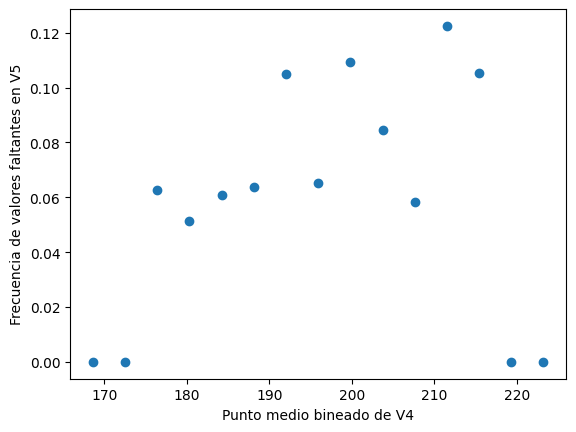

In [ ]:
plt.scatter(vf_V4V5['bin_centres'], vf_V4V5['freq'])
plt.xlabel('Punto medio bineado de V4')
plt.ylabel('Frecuencia de valores faltantes en V5')
plt.show()

¿Te parece que da alguna información este gráfico? No te apures a sacar conclusiones. Vuelve a repetir los pasos, pero invirtiendo el rol de `V5` y `V4` - solamente tienes que copiar cada celda e intercalar los nombres. Una vez que hayas llegado al gráfico, ahora sí mira si puedes sacar alguna conclusión.

In [ ]:
df_VF['V5-intervalos'] = pd.cut(df_VF.V5, bins  = 15)
df_VF

,V1,V2,V3,V4,V5,V4-intervalos,V5-intervalos
0,C,1.0,986.175237,184.258917,2224.638050,"(182.265, 186.168]","(2178.049, 2235.445]"
1,C,1.0,994.130276,NaN,2570.213101,NaN,"(2522.424, 2579.82]"
2,A,1.0,985.782622,196.893581,2309.238832,"(193.974, 197.876]","(2292.841, 2350.236]"
3,A,1.0,1029.464887,192.063247,2349.259233,"(190.071, 193.974]","(2292.841, 2350.236]"
4,A,1.0,1004.357092,NaN,2474.036357,NaN,"(2465.028, 2522.424]"
...,...,...,...,...,...,...,...
1495,C,0.0,985.188653,190.366109,2302.000694,"(190.071, 193.974]","(2292.841, 2350.236]"
1496,C,0.0,991.730134,193.553401,2277.045998,"(190.071, 193.974]","(2235.445, 2292.841]"
1497,B,0.0,1032.150519,NaN,2347.760632,NaN,"(2292.841, 2350.236]"
1498,C,1.0,984.522924,196.373516,2393.847484,"(193.974, 197.876]","(2350.236, 2407.632]"


In [ ]:
vf_V5V4 = df_VF.V4.isnull().groupby([df_VF['V5-intervalos']]).sum().astype(int).reset_index(name='count')
vf_V5V4

,V5-intervalos,count
0,"(2005.0, 2063.257]",0
1,"(2063.257, 2120.653]",1
2,"(2120.653, 2178.049]",0
3,"(2178.049, 2235.445]",4
4,"(2235.445, 2292.841]",9
5,"(2292.841, 2350.236]",26
6,"(2350.236, 2407.632]",39
7,"(2407.632, 2465.028]",58
8,"(2465.028, 2522.424]",79
9,"(2522.424, 2579.82]",79


In [ ]:
vf_V5V4['freq'] = vf_V5V4['count']/df_VF.groupby([df_VF['V5-intervalos']]).count()['V5'].values
vf_V5V4

,V5-intervalos,count,freq
0,"(2005.0, 2063.257]",0,0.000000
1,"(2063.257, 2120.653]",1,0.040000
2,"(2120.653, 2178.049]",0,0.000000
3,"(2178.049, 2235.445]",4,0.049383
4,"(2235.445, 2292.841]",9,0.058824
5,"(2292.841, 2350.236]",26,0.134715
6,"(2350.236, 2407.632]",39,0.157895
7,"(2407.632, 2465.028]",58,0.254386
8,"(2465.028, 2522.424]",79,0.461988
9,"(2522.424, 2579.82]",79,0.612403


In [ ]:
vf_V5V4["bin_centres"] = vf_V5V4["V5-intervalos"].apply(lambda x: x.mid)
vf_V5V4

,V5-intervalos,count,freq,bin_centres
0,"(2005.0, 2063.257]",0,0.000000,2034.1285
1,"(2063.257, 2120.653]",1,0.040000,2091.9550
2,"(2120.653, 2178.049]",0,0.000000,2149.3510
3,"(2178.049, 2235.445]",4,0.049383,2206.7470
4,"(2235.445, 2292.841]",9,0.058824,2264.1430
5,"(2292.841, 2350.236]",26,0.134715,2321.5385
6,"(2350.236, 2407.632]",39,0.157895,2378.9340
7,"(2407.632, 2465.028]",58,0.254386,2436.3300
8,"(2465.028, 2522.424]",79,0.461988,2493.7260
9,"(2522.424, 2579.82]",79,0.612403,2551.1220


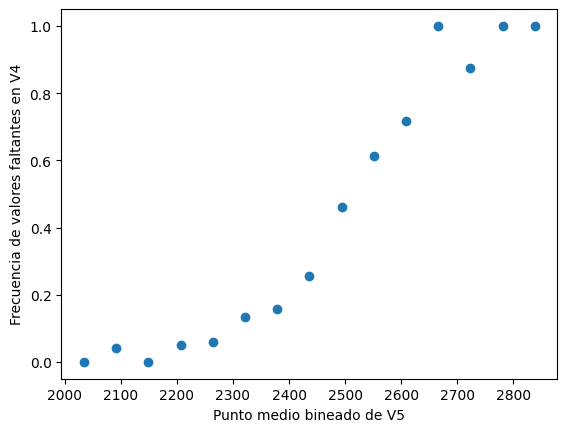

In [ ]:
plt.scatter(vf_V5V4['bin_centres'], vf_V5V4['freq'])
plt.xlabel('Punto medio bineado de V5')
plt.ylabel('Frecuencia de valores faltantes en V4')
plt.show()

¿Has llegado a alguna conclusión? Entre `V4` y `V5`, ¿cuál es MNAR y cuál MCAR? ¿Y en `V2`?

Antes decia que:
De las columnas con valores faltantes:
* Dos tienen valores faltantes MCAR (el valor faltante es completamente al azar y no depende de otras variables)
* Una tiene valores faltantes MAR (la probabilidad de valor faltante depende de otra variable).
* Una tiene valores faltantes MNAR (la probabilidad de valor faltante depende de esa misma variable).

Entonces, V4 es MNAR y V3 es MAR. Por descarte, V2 Y V5 son MCAR. Estas de acuerdo?

---
## Imputación de valores faltantes

Vamos a *imputar* los valores faltantes sobre el dataset sintético y para luego aplicarlo al dataset de "Distrofia".

Te recomendamos que:

1. Al tratarse de un dataset pequeño, puedes copiar el dataset, dejar a un lado el original y rellenar valores faltantes en la copia. De esta forma, podrás evaluar tu estrategia (ver punto siguiente) y/o comparar distintas estrategias.
1. Haz histogramas de las variables con y sin valores faltantes. Al imputar, ¿cambián las distribuciones?¿Esto está bien o mal?

Comienza con una estrategia sencilla, imputar con el valor medio de cada columna usando Pandas. ¿Para cuáles columnas tendrá sentido esto, teniendo en cuenta lo visto en el punto anterior?


In [ ]:
# Vuelvo a cargar el dataset original
data_2 = pd.read_csv('/content/drive/MyDrive/CURSOS/UTN - APRENDIZAJE AUTOMATICO - 2025/CLASES UTN - AA/4__Introducción al A.A. + EDA/Data_con_VF.csv')
data_2.head()

,V1,V2,V3,V4,V5
0,C,1.0,986.175237,184.258917,2224.638050
1,C,1.0,994.130276,NaN,2570.213101
2,A,1.0,985.782622,196.893581,2309.238832
3,A,1.0,1029.464887,192.063247,2349.259233
4,A,1.0,1004.357092,NaN,2474.036357


In [ ]:
#Volvemos a ver los valores faltantes
print(data_2.isna().sum())

V1      0
V2    159
V3    104
V4    413
V5    118
dtype: int64


<Axes: xlabel='V2', ylabel='Density'>

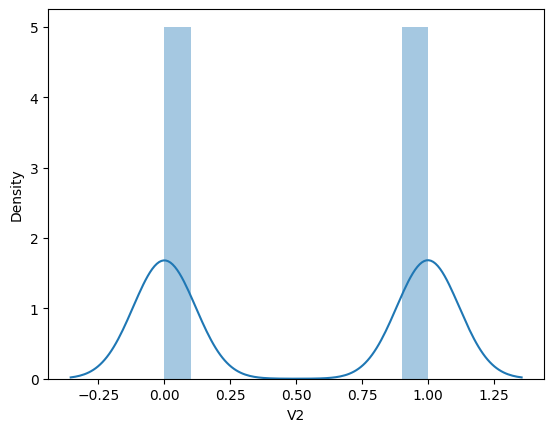

In [ ]:
sns.distplot(data_2['V2'], bins = 10)

<Axes: xlabel='V1', ylabel='count'>

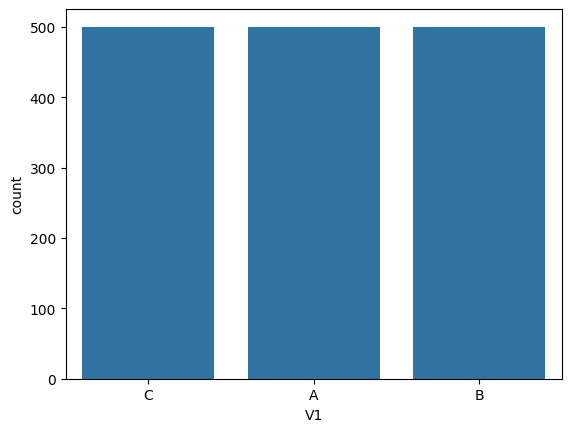

In [ ]:
sns.countplot(data = data_2, x = "V1")

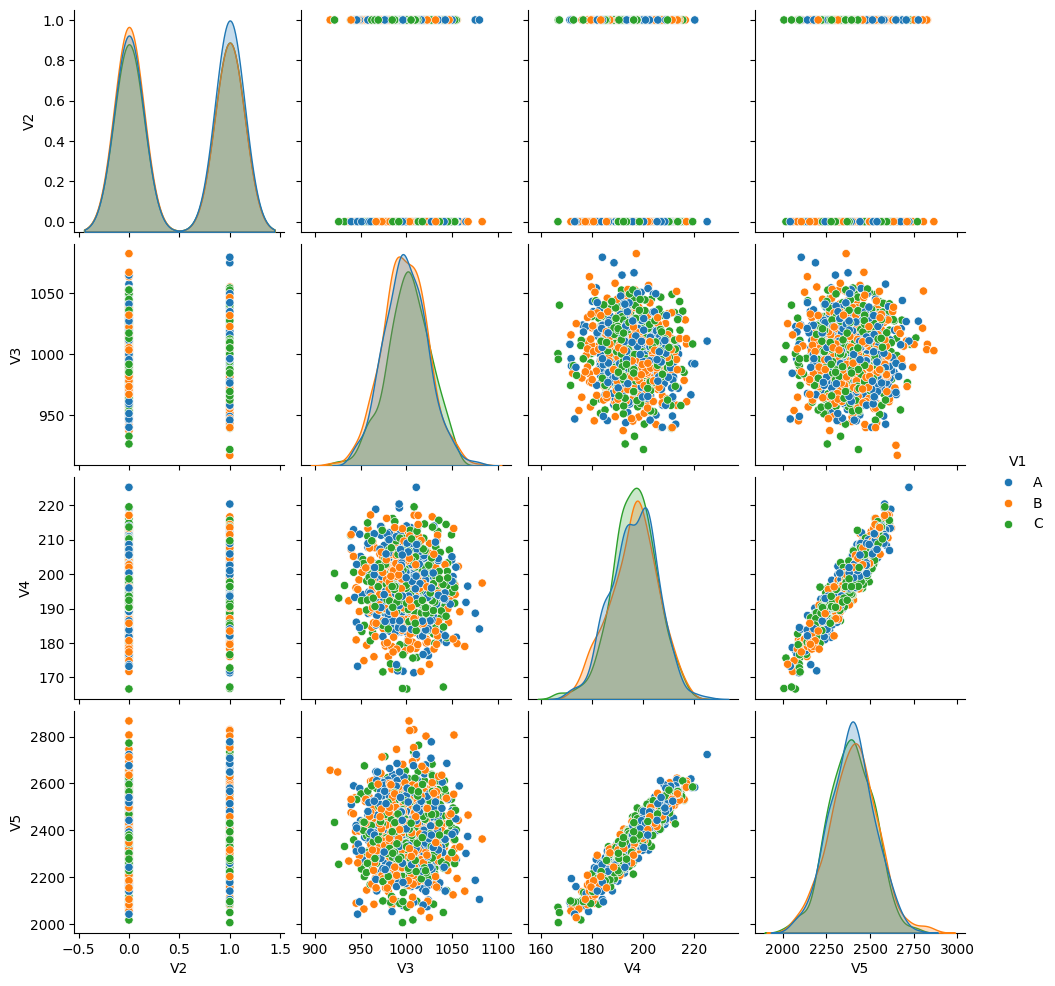

In [ ]:
sns.pairplot(data_2, hue = 'V1', hue_order=['A', 'B', 'C'])

In [ ]:
#Copio la data en un nuevo archivo para reemplazar datos faltantes
data_copy = data_2.copy()
data_copy

,V1,V2,V3,V4,V5
0,C,1.0,986.175237,184.258917,2224.638050
1,C,1.0,994.130276,NaN,2570.213101
2,A,1.0,985.782622,196.893581,2309.238832
3,A,1.0,1029.464887,192.063247,2349.259233
4,A,1.0,1004.357092,NaN,2474.036357
...,...,...,...,...,...
1495,C,0.0,985.188653,190.366109,2302.000694
1496,C,0.0,991.730134,193.553401,2277.045998
1497,B,0.0,1032.150519,NaN,2347.760632
1498,C,1.0,984.522924,196.373516,2393.847484


In [ ]:
#data_copy.fillna(data_copy.mean(),inplace = True)
data_copy.fillna(data_copy.select_dtypes(include='number').mean(), inplace=True)

In [ ]:
data_copy.isna().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0


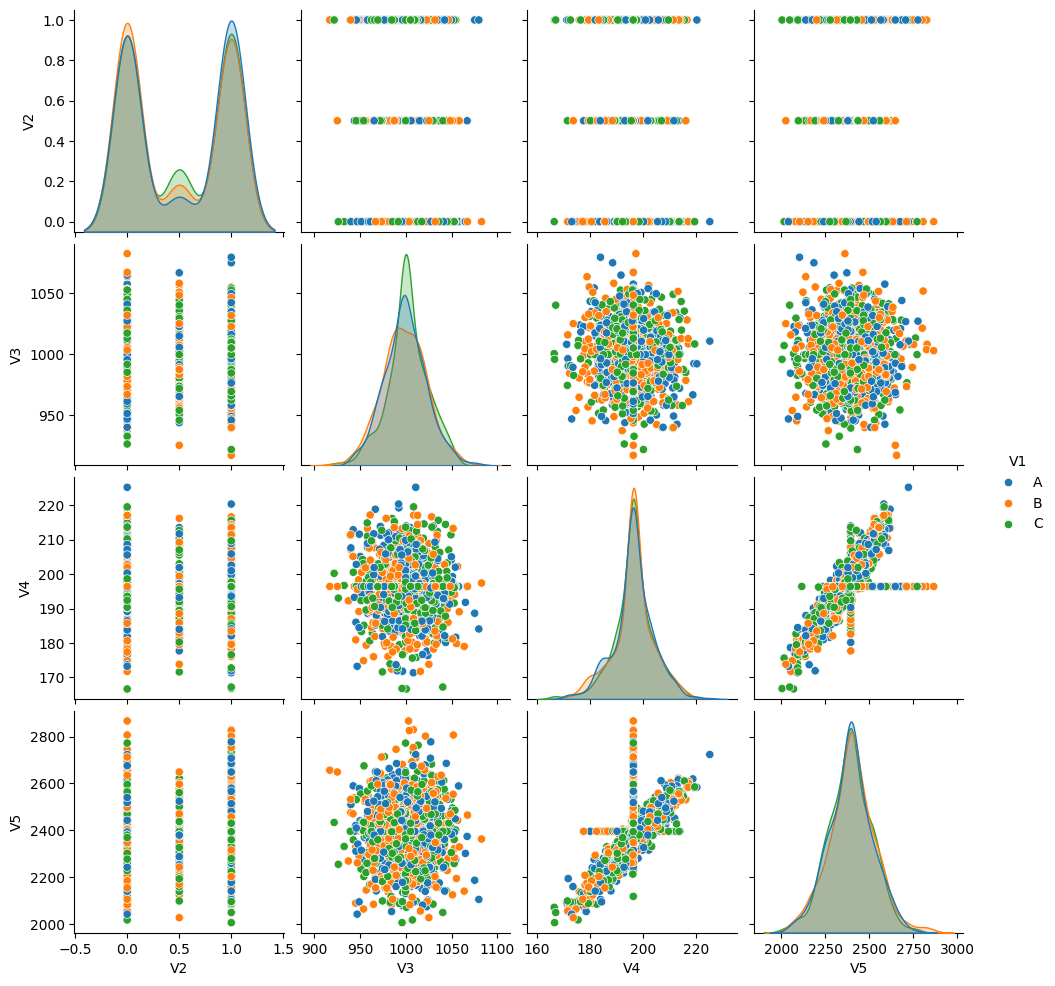

In [ ]:
sns.pairplot(data_copy, hue = 'V1', hue_order=['A', 'B', 'C'])

Cambia un poco la distribucion de todas las variables, pero no mucho.
En V2 que que es dicotomica (dos valores) no tiene sentido imputar porque agrega un valor en el medio.  En la relacion entre V4 y V5 agrega asintotas que no siguen la relacion, (cuidado!). En V3 tiene sentido imputar con el valor medio por clase.

---
## Valores Atípicos



In [ ]:
data_VA = pd.read_csv('/content/drive/MyDrive/.....Data_.....csv')
data_VA.head()


,Datos
0,2.370556
1,3.437876
2,6.300131
3,5.403170
4,5.722120


In [ ]:
data_VA.describe()

,Datos
count,1000.000000
mean,5.059634
std,2.162233
min,-2.619781
25%,3.630454
50%,4.995364
75%,6.371097
max,13.613645


/tmp/ipython-input-2635040269.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_VA.values)


<Axes: ylabel='Density'>

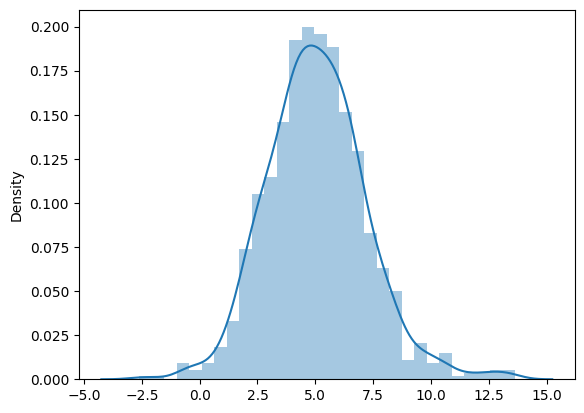

In [ ]:
sns.distplot(data_VA.values)

<Axes: >

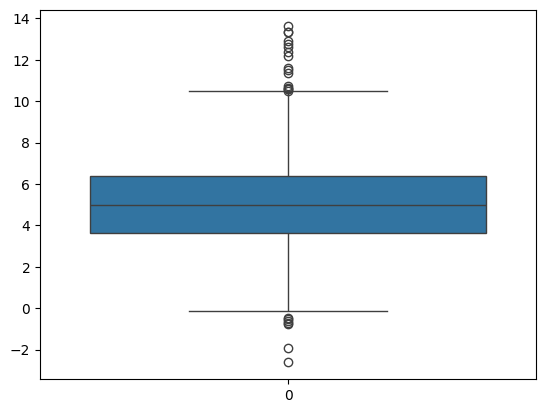

In [ ]:
sns.boxplot(data_VA.values)

**Manejo de outliers**

1. Rango Intercuartílico

In [ ]:
q25,q75 = np.percentile(data_VA.Datos.values, [25,75]) #q25 = dataframe[columna].quantile(0.25)

iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
print(q25,q75,iqr, minimo, maximo)

3.6304538110419 6.371096932721359 2.7406431216794593 -0.48051087147728877 10.482061615240548


In [ ]:
data_VA.Datos < minimo

,Datos
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [ ]:
mascara_outliers = (data_VA.Datos < minimo) | (data_VA.Datos > maximo)
mascara_outliers.sum()

np.int64(23)

In [ ]:
data_VA[mascara_outliers]

,Datos
27,12.908427
86,12.633931
112,13.358959
181,-1.925574
195,-0.486077
231,10.587165
251,10.519530
309,-0.537363
388,12.166490
399,10.592049


<Axes: >

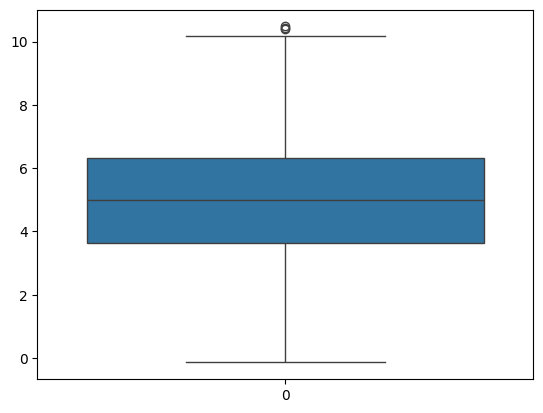

In [ ]:
mascara = np.logical_and(data_VA.Datos > minimo, data_VA.Datos < maximo) #aplica la operación lógica OR (o disyunción) de manera elemento a elemento entre dos arrays booleanos (o entre condiciones que se pueden evaluar como booleanas)
data_filtrada = data_VA[mascara]
sns.boxplot(data_filtrada.values)

2. Regla de las tres sigmas

In [ ]:
data_VA.describe()

,Datos
count,1000.000000
mean,5.059634
std,2.162233
min,-2.619781
25%,3.630454
50%,4.995364
75%,6.371097
max,13.613645


In [ ]:
valor_medio = data_VA.Datos.mean()
std = data_VA.Datos.std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_tres_sigmas = np.logical_or(data_VA.Datos < minimo, data_VA.Datos > maximo)

In [ ]:
mascara_tres_sigmas.sum()

np.int64(11)

In [ ]:
data_VA[mascara_tres_sigmas]

,Datos
27,12.908427
86,12.633931
112,13.358959
181,-1.925574
388,12.166490
426,-2.619781
475,12.788713
624,11.628151
662,13.613645
899,12.367070


In [ ]:
mascara2 = np.logical_and(data_VA.Datos > minimo, data_VA.Datos < maximo)
data_fil = data_VA[mascara2]

<Axes: >

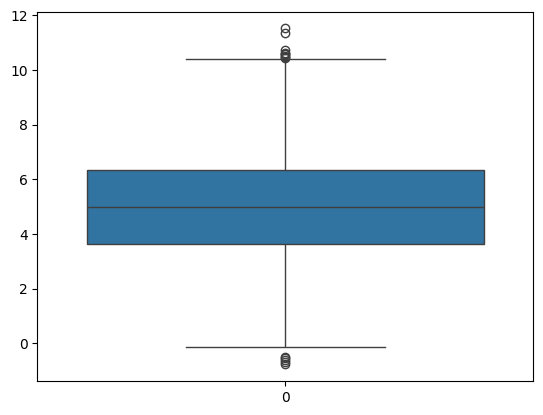

In [ ]:
sns.boxplot(data_fil.values)

---
## 3. Escalado de datos

Seguiremos usando los datos de la sección anterior:

1. Agregar al dataframe una columna que se llame "Datos_Reescalados" y que contenga los datos reescalados por Z-Score. ¿Cuál es el valor medio de los datos reescalados?¿Y su desviación estándar? **Nota:** Para reescalar los datos, pueden hacerlo "a mano" o utilizar la clase `StandardScaler` de Scikit-Learn. No te olvides que las herramientas de preprocesamiento de datos de Scikit-learn tienen los mismos métodos (crear el objeto, fitearlo, transfromar los datos). Si necesitás ayuda, podés consultar la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
2. Realizá, en un mismo gráfico, un histograma de los datos reescaleados y un histograma de los datos crudos. ¿Qué similitudes y qué diferencias tiene con la distribución de datos crudos?
3. Aplica la regla de las tres sigmas utilizando los datos reescalados.
    

In [ ]:
data_VA.describe()

,Datos
count,1000.000000
mean,5.059634
std,2.162233
min,-2.619781
25%,3.630454
50%,4.995364
75%,6.371097
max,13.613645


In [ ]:
data_ESC = data_VA.copy()
data_ESC.head()

,Datos
0,2.370556
1,3.437876
2,6.300131
3,5.403170
4,5.722120


In [ ]:
valor_medio = data_ESC.Datos.mean()
std = data_ESC.Datos.std()
data_ESC['Datos_Reescalados'] = (data_ESC.Datos - valor_medio)/std
data_ESC.head()

,Datos,Datos_Reescalados
0,2.370556,-1.243658
1,3.437876,-0.750039
2,6.300131,0.573711
3,5.403170,0.158880
4,5.722120,0.306390


In [ ]:
print(data_ESC.Datos_Reescalados.mean(), data_ESC.Datos_Reescalados.std())

-5.684341886080802e-17 1.000000000000001


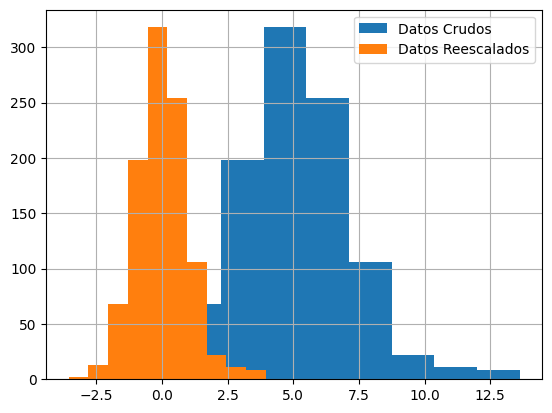

In [ ]:
data_ESC.Datos.hist(label = 'Datos Crudos')
data_ESC.Datos_Reescalados.hist(label = 'Datos Reescalados')
plt.legend()
plt.show()

In [ ]:
mascara_outliers = np.logical_or(data_ESC.Datos_Reescalados < -3, data_ESC.Datos_Reescalados > 3)
print(mascara_outliers.sum())

11


In [ ]:
data_ESC[mascara_outliers]

,Datos,Datos_Reescalados
27,12.908427,3.629948
86,12.633931,3.502998
112,13.358959,3.838312
181,-1.925574,-3.230553
388,12.166490,3.286813
426,-2.619781,-3.551613
475,12.788713,3.574582
624,11.628151,3.037840
662,13.613645,3.956101
899,12.367070,3.379579


<Axes: >

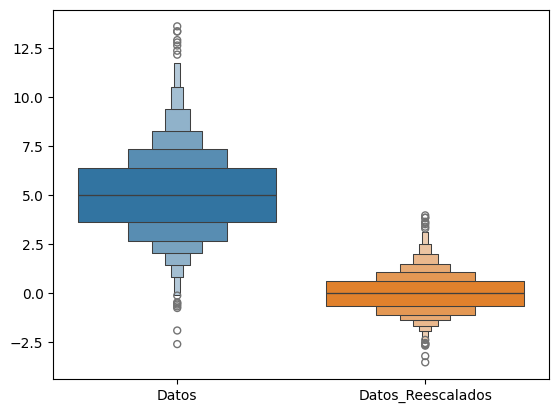

In [ ]:
sns.boxenplot(data= data_ESC)

##Otra forma de escalar los datos (StandardScaler)

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_ESC_SS = data_VA.copy()
data_ESC_SS['Datos_Reescalados'] = pd.DataFrame(std_scaler.fit_transform(data_ESC_SS))
data_ESC_SS.head()

,Datos,Datos_Reescalados
0,2.370556,-1.244280
1,3.437876,-0.750414
2,6.300131,0.573998
3,5.403170,0.158960
4,5.722120,0.306543


<Axes: >

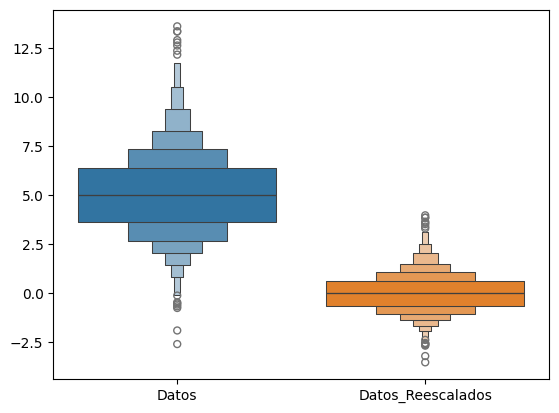

In [ ]:
sns.boxenplot(data= data_ESC_SS)

# PRÁCTICA FINAL: Datos de "Distrofia"
<p align="justify">

La Distrofia Muscular de Duchenne (DMD) es una enfermedad que se transmite genéticamente de madres a hijos e hijas. Mientras que los varones mueren a temprana edad, las mujeres pueden llevar la enfermedad sin saberlo y sin síntomas. Se estima que 1 de cada 3300 mujeres son portadoras de la enfermedad.

Si bien portadoras de DMD no suelen tener síntomas, tienden a exhibir elevados niveles de enzimas o proteínas del suero, como creatina quinasa (CK, por sus siglas en inglés), hemopexina (H), lactato deshidrogenasa (LD) y piruvato quinasa (PK, por sus siglas en inglés). Los niveles de estas enzimas también pueden variar con la edad y la estación. En un estudio llevado a cabo a finales de la década del 70 se midieron esas enzimas en portadoras y no-portadoras de la enfermedad, para estudiar la posibilidad de informar a mujeres la posibilidad de que sean portadoras.

En este dataset hay valores faltantes en dos de sus columnas. Estos valores faltantes no aparecerán inmediatamente como `NaN` cuando abran el dataset con Pandas, sino que están guardados con un valor en particular. Abre y explora el dataset para descubrir ese valor. Luego, investiga como puedes pasar como argumento a la función de Pandas `read_csv` para que cuando cargue los datos ya los reconozca como valores faltantes. ¿Qué tipo de valores faltantes son?¿Están asociados a los valores de otras columnas?

**1. Exploración de Datos**

1. Abri  los datos y exploralos. Para ello, recomendamos hacer un `distplot` y un `boxplot`. ¿Hay valores atípicos?

2. Calcular algunos estadísticos sobre la muestra: valor medio, desviación estándar, cuartiles, máximo, mínimo, correlaciones, etc.

In [ ]:
#Cargo el dataset
data_VF =
data_D = pd.read_csv('/content/drive/MyDrive/........Data_Distrofia.csv')
data_D.isna().sum()


edad    0
mes     0
año     0
CK      0
H       0
PK      0
LD      0
DMD     0
dtype: int64

In [ ]:
data_D.shape

(209, 8)

In [ ]:
data_D.head()

,edad,mes,año,CK,H,PK,LD,DMD
0,22.0,6.0,79.0,52.0,83.5,10.9,176.0,0
1,32.0,8.0,78.0,20.0,77.0,11.0,200.0,0
2,36.0,7.0,78.0,28.0,86.5,13.2,171.0,0
3,22.0,11.0,79.0,30.0,104.0,22.6,230.0,0
4,23.0,1.0,78.0,40.0,83.0,15.2,205.0,0


In [ ]:
data_D.describe()

,edad,mes,año,CK,H,PK,LD,DMD
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,32.157895,6.569378,78.641148,92.260766,84.285167,-367.277512,-142.956938,0.358852
std,8.572594,2.916501,0.572134,152.895531,17.063916,1926.195428,1840.585939,0.480815
min,20.000000,1.000000,77.000000,15.000000,9.000000,-9999.000000,-9999.000000,0.000000
25%,26.000000,4.000000,78.000000,30.000000,78.000000,10.100000,145.000000,0.000000
50%,31.000000,7.000000,79.000000,41.000000,86.000000,13.000000,176.000000,0.000000
75%,36.000000,9.000000,79.000000,73.000000,93.200000,17.100000,230.000000,1.000000
max,61.000000,12.000000,80.000000,1288.000000,118.000000,110.000000,593.000000,1.000000


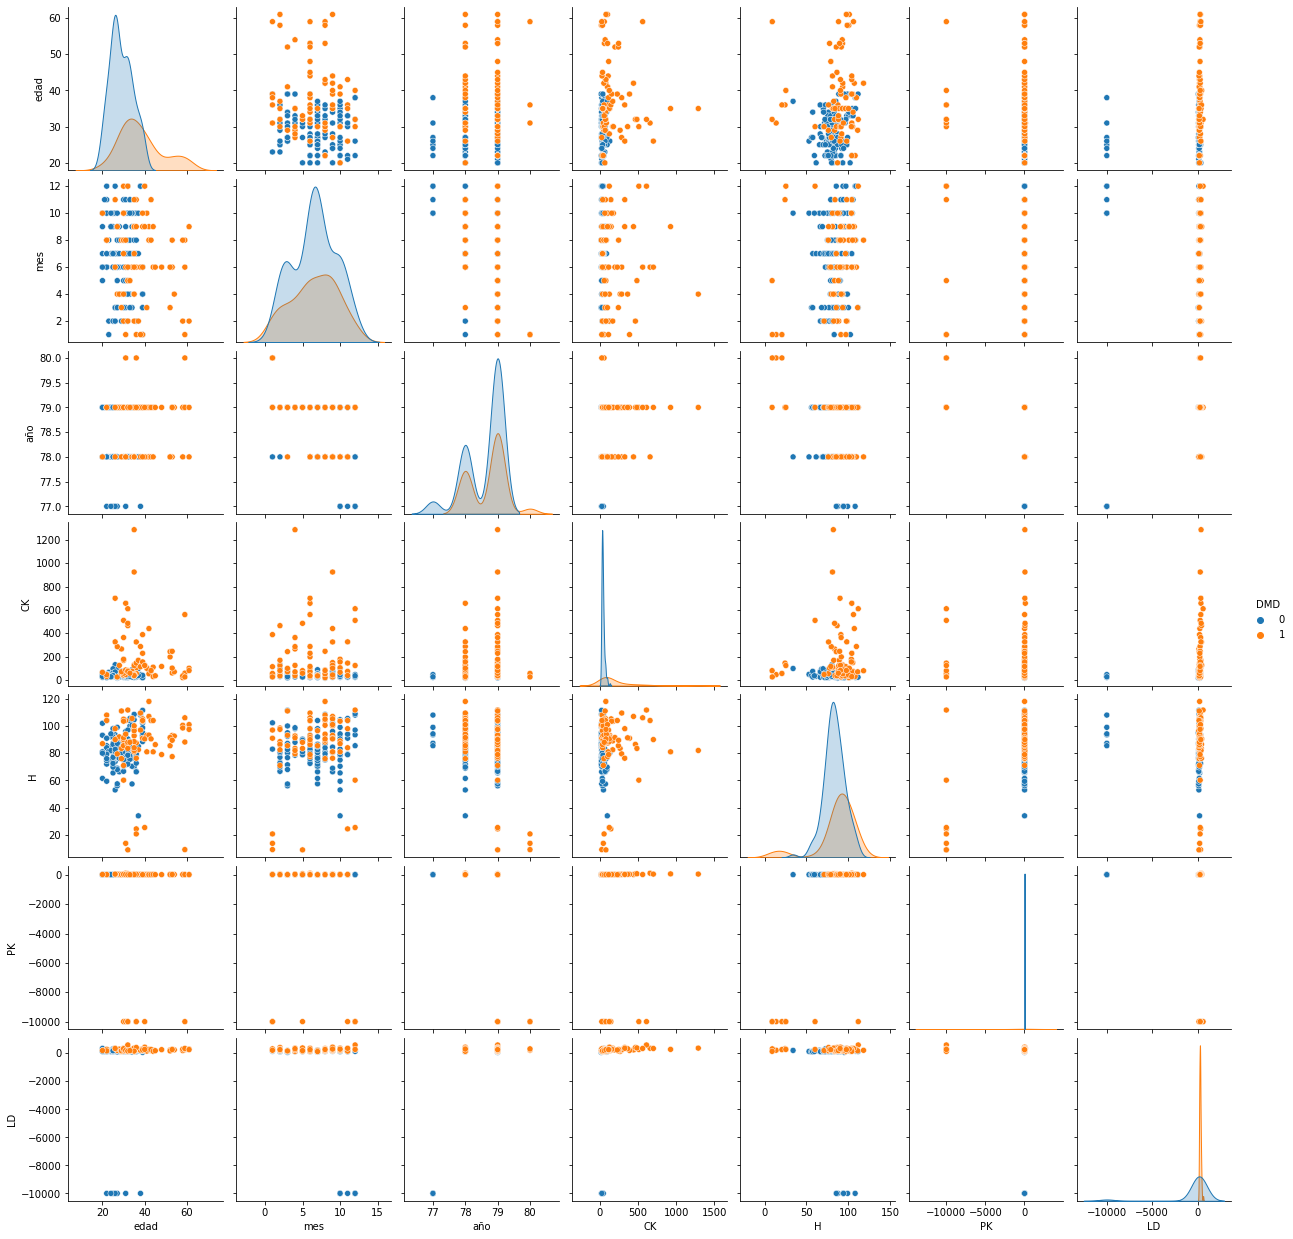

In [ ]:
sns.pairplot(data_D, hue = 'DMD')
plt.show()

In [ ]:
data_D = pd.read_csv('DS_Bitácora_19_Distrofia.csv',na_values=-9999)

data_D.isna().sum()

edad    0
mes     0
año     0
CK      0
H       0
PK      8
LD      7
DMD     0
dtype: int64

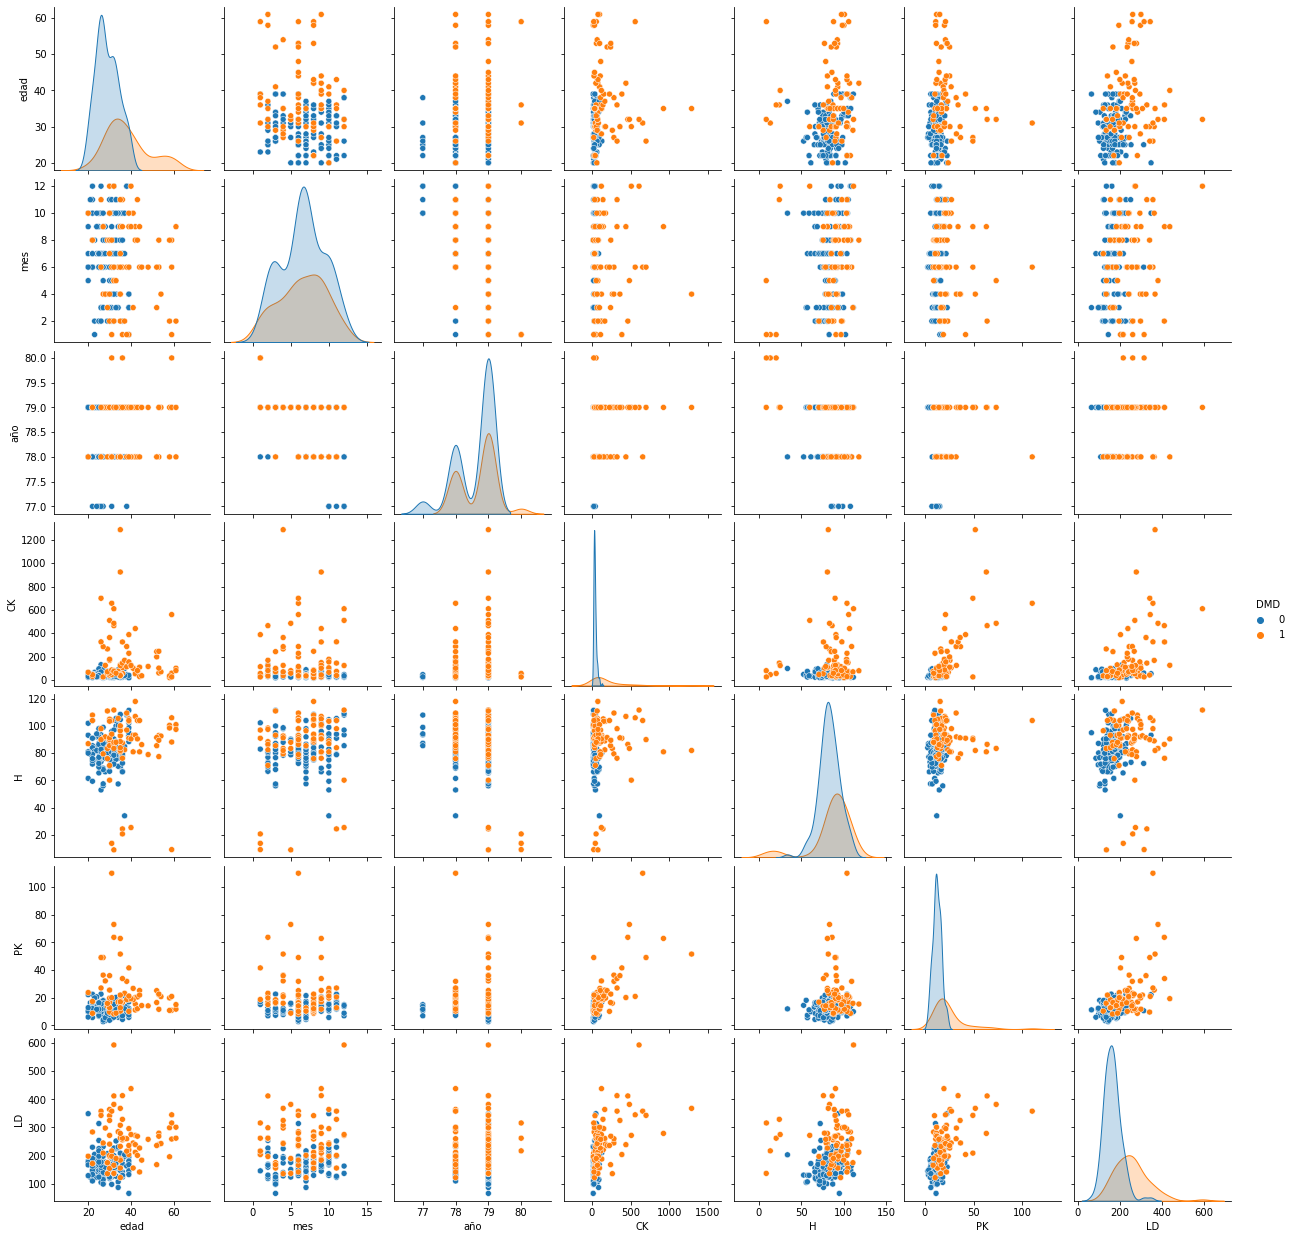

In [ ]:
sns.pairplot(data_D, hue = 'DMD')
plt.show()

In [ ]:
data_D_copy = data_D.copy()
data_D_copy.fillna(data_D_copy.mean(),inplace = True)
data_D_copy.isna().sum()


edad    0
mes     0
año     0
CK      0
H       0
PK      0
LD      0
DMD     0
dtype: int64

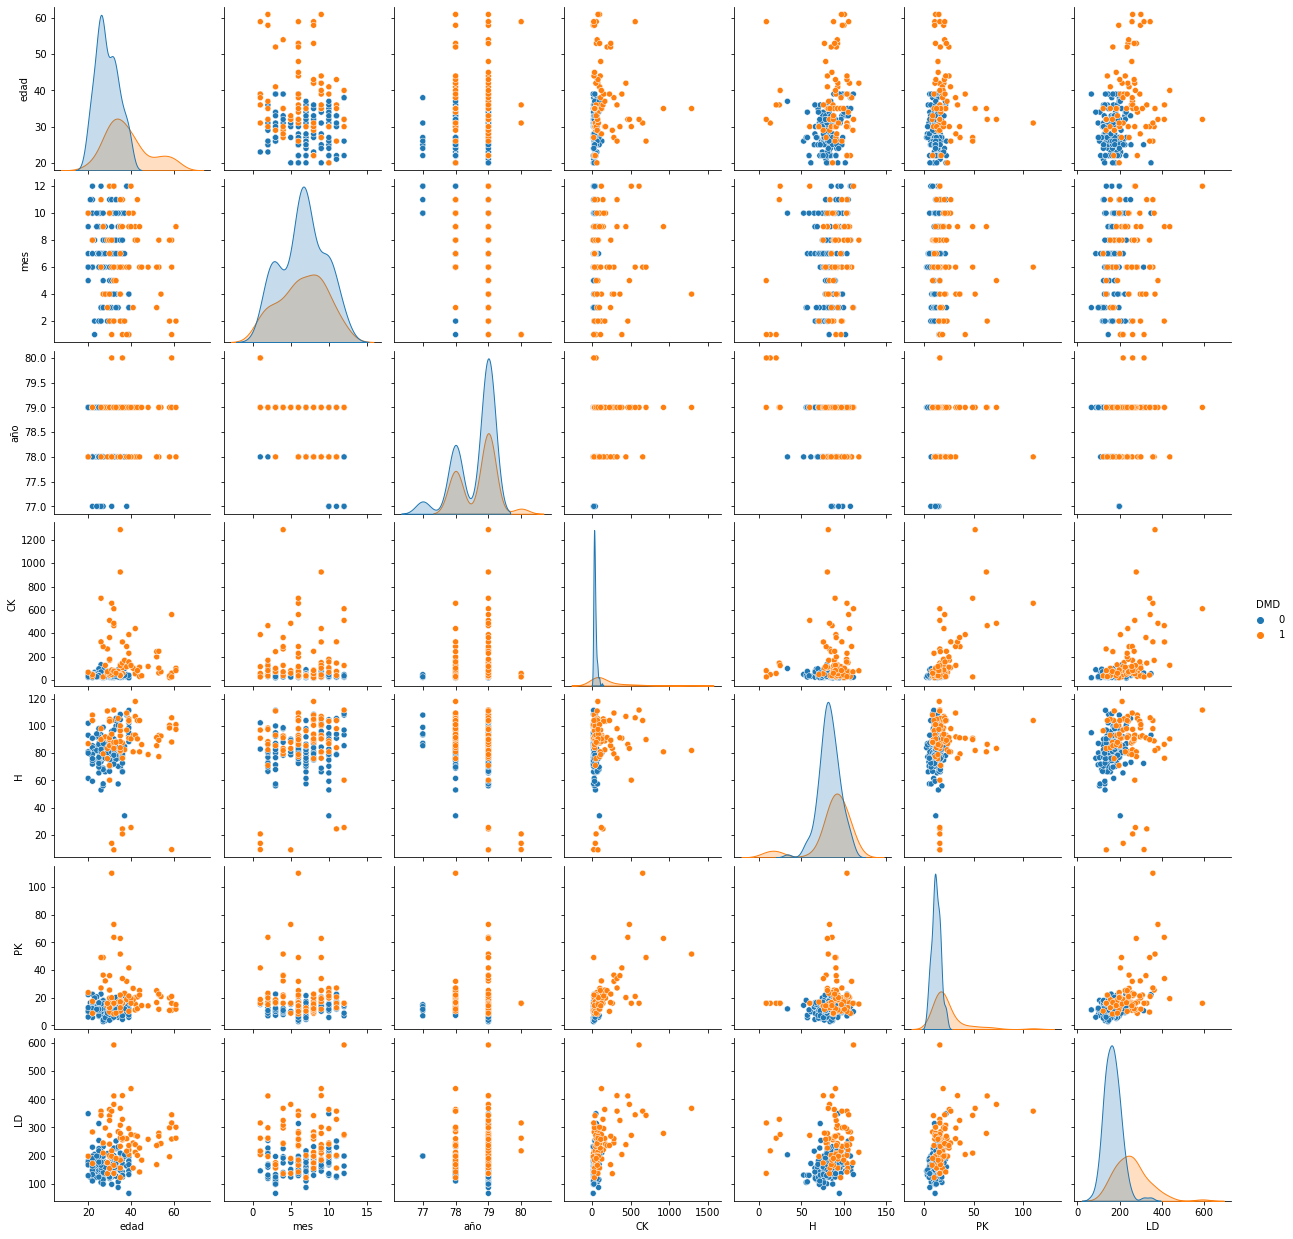

In [ ]:
sns.pairplot(data_D_copy, hue = 'DMD')
plt.show()

Miramos si hay relacion de datos faltantes en PK y LD con otra variable

In [ ]:
data_D.PK.isnull().groupby([data_D['año']]).sum().astype(int).reset_index(name='count')

,año,count
0,77.0,0
1,78.0,0
2,79.0,5
3,80.0,3


In [ ]:
data_D.LD.isnull().groupby([data_D['año']]).sum().astype(int).reset_index(name='count')

,año,count
0,77.0,7
1,78.0,0
2,79.0,0
3,80.0,0


In [ ]:
data_D.LD.isnull().groupby([data_D['DMD']]).sum().astype(int).reset_index(name='count')

,DMD,count
0,0,7
1,1,0


In [ ]:
data_D.PK.isnull().groupby([data_D['DMD']]).sum().astype(int).reset_index(name='count')

,DMD,count
0,0,0
1,1,8


Existen  8 valores faltantes en el atributo piruvato quinasa (PK), todos asociados a instancias portadoras, y 7 en el atributo lactato deshidrogenasa (LD), asociados a instancias no portadoras.

Este es un ejemplo en el cual tiene sentido imputar calculando el valor medio por clase (portadora - no portadora).

In [ ]:
data_D_copy2 = data_D.copy()
data_D_copy2.isna().sum()


edad    0
mes     0
año     0
CK      0
H       0
PK      8
LD      7
DMD     0
dtype: int64

In [ ]:
valores_medios_PK = data_D_copy2.groupby('DMD')['PK'].mean()

In [ ]:
valores_medios_LD = data_D_copy2.groupby('DMD')['LD'].mean()

In [ ]:
valores_medios_LD = dict(round(valores_medios_LD))
valores_medios_LD

{0: 165.0, 1: 256.0}

In [ ]:
valores_medios_PK = dict(round(valores_medios_PK))
valores_medios_PK

{0: 12.0, 1: 24.0}

In [ ]:
data_D_copy2.LD =data_D_copy2.LD.fillna(data_D_copy2.DMD.map(valores_medios_LD))

In [ ]:
data_D_copy2.PK =data_D_copy2.PK.fillna(data_D_copy2.DMD.map(valores_medios_PK))

In [ ]:
data_D_copy2.isna().sum()


edad    0
mes     0
año     0
CK      0
H       0
PK      0
LD      0
DMD     0
dtype: int64

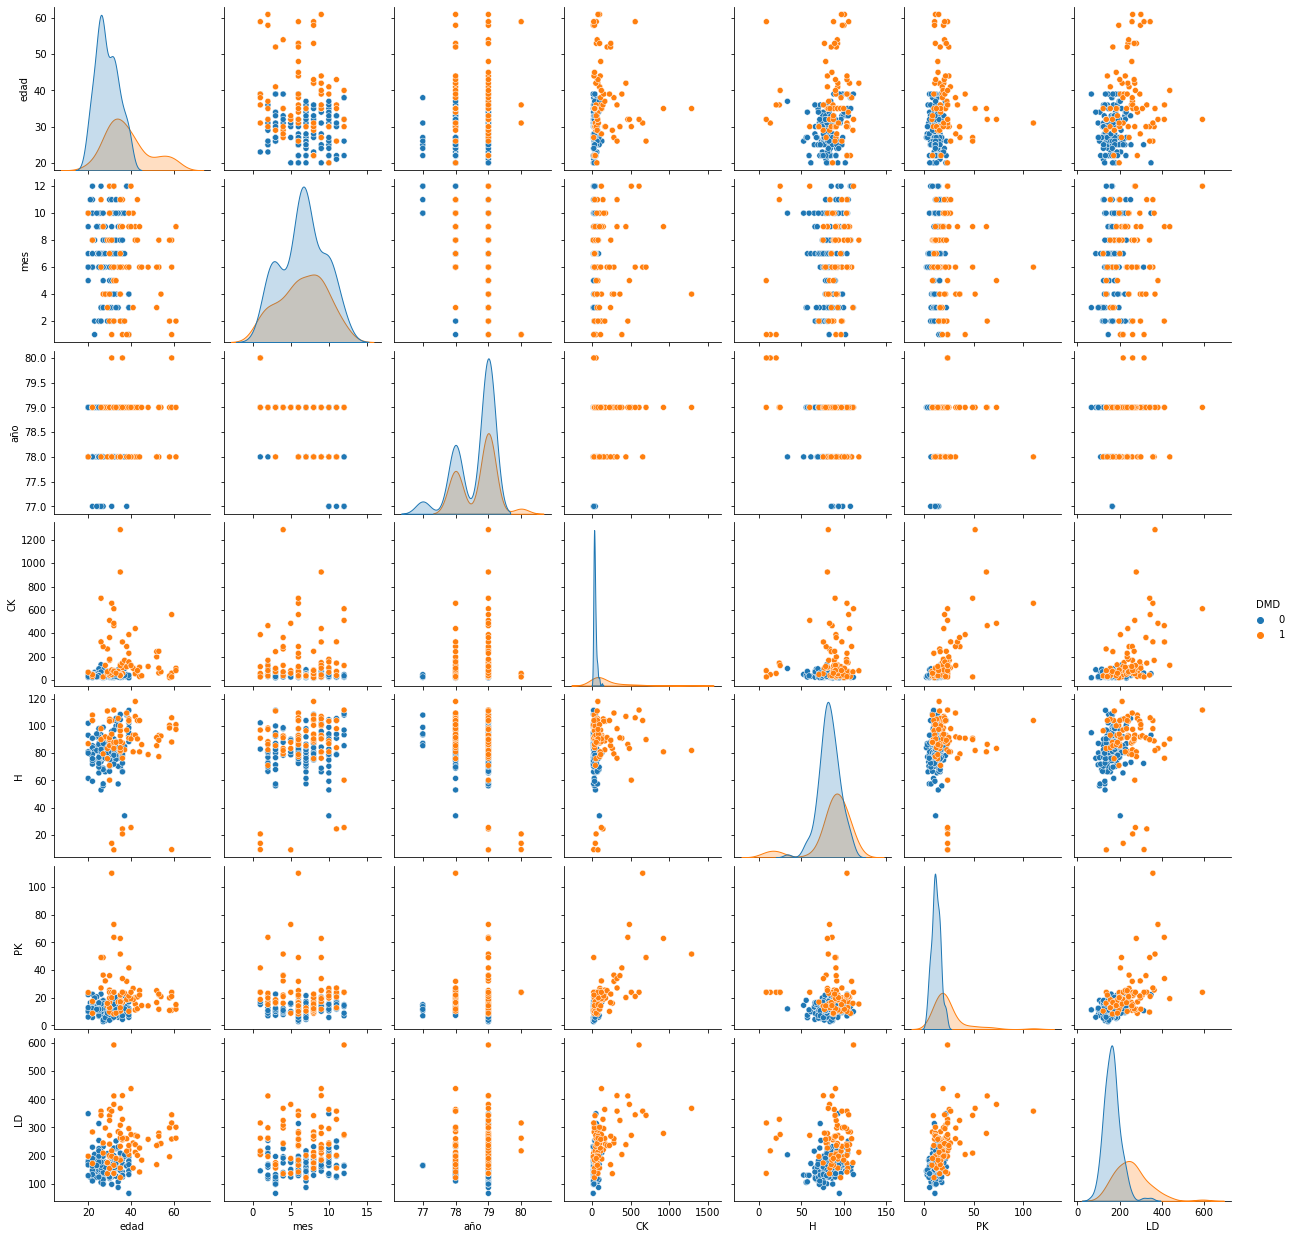

In [ ]:
sns.pairplot(data_D_copy2, hue = 'DMD')
plt.show()